In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import seaborn as sns

In [ ]:
# Load dataset
from google.colab import drive
drive.mount('/content/drive/')
data=pd.read_csv('Zoo.csv')
data

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


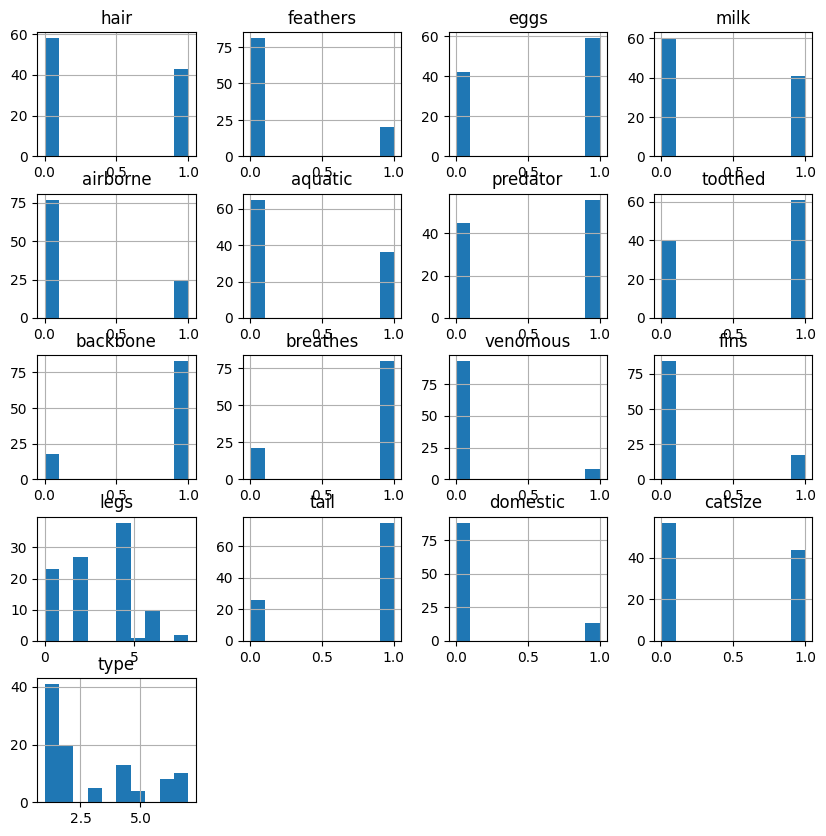

In [ ]:
# Analyze the data using visualizations (you can add more visualizations as needed)
# For example, histogram of each feature
data.hist(figsize=(10,10))
plt.show()


In [ ]:
# Preprocessing the data
# Dropping 'animal name' column
data.drop(columns=['animal name'], inplace=True)
print("After dropping 'animal name' column, dataset size:", data.shape)


After dropping 'animal name' column, dataset size: (101, 17)


In [ ]:
# Handling missing values
data.fillna(data.median(), inplace=True)
print("After handling missing values, dataset size:", data.shape)


After handling missing values, dataset size: (101, 17)


In [ ]:
# Handling outliers (you can use other techniques as needed)
# For example, Z-score based outlier detection and removal
z_scores = (data - data.mean()) / data.std()
data = data[(np.abs(z_scores) < 3).all(axis=1)]
print("After handling outliers, dataset size:", data.shape)


After handling outliers, dataset size: (93, 17)


In [ ]:
# Check if the dataset still contains samples after preprocessing
if data.shape[0] == 0:
    print("Error: Dataset is empty after preprocessing. Adjust preprocessing steps.")
    exit()


In [ ]:
# Splitting the dataset into features and target variable
X = data.drop(columns=['type'])  # Features
y = data['type']  # Target variable

In [ ]:
# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Implementing K-Nearest Neighbors algorithm
k = 5  # value for K
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
# Evaluating the classifier's performance
y_pred = classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9473684210526315
Precision: 0.9078947368421053
Recall: 0.9473684210526315
F1 Score: 0.9248120300751879


In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[10  0  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  1]]


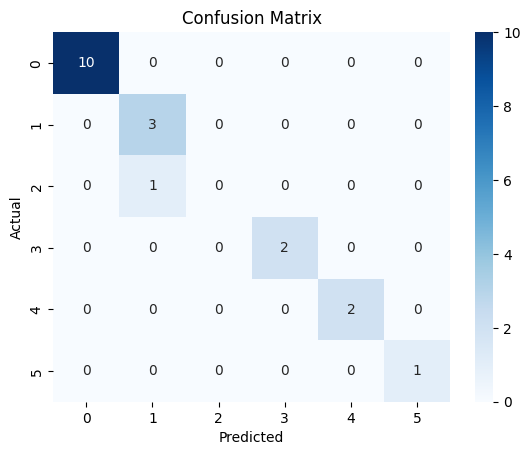

In [ ]:
# Plotting the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

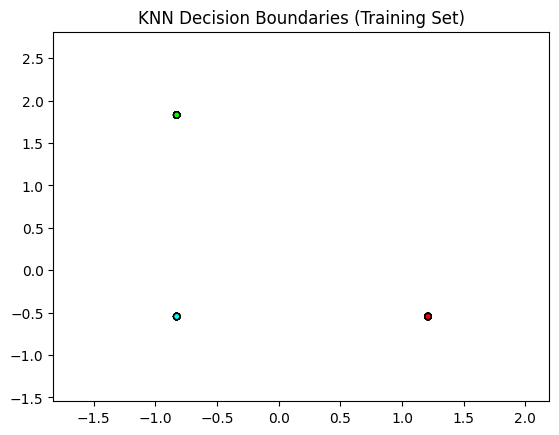

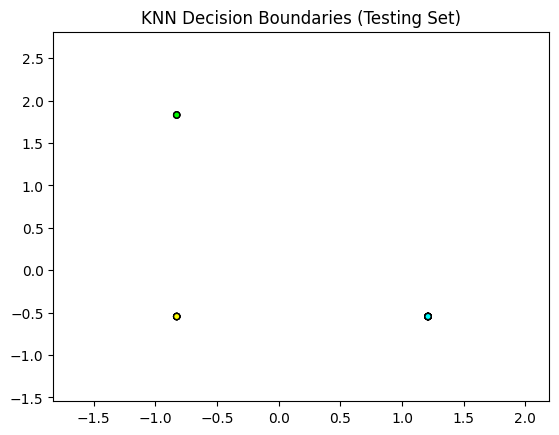

In [ ]:
# Visualizing decision boundaries
def plot_decision_boundaries(X, y, classifier, title):
    h = 0.02  # step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA', '#FFAAFF', '#AAFFFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    # Z = Z.reshape(xx.shape)
    plt.figure()
    # plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

# Assuming only first 2 features for visualization
X_train_vis = X_train_scaled[:, :2]
X_test_vis = X_test_scaled[:, :2]
y_train_vis = np.array(y_train)
y_test_vis = np.array(y_test)

plot_decision_boundaries(X_train_vis, y_train_vis, classifier, "KNN Decision Boundaries (Training Set)")
plot_decision_boundaries(X_test_vis, y_test_vis, classifier, "KNN Decision Boundaries (Testing Set)")
